# HK opinion

## Data preparation
http://www.hkex.com.hk/Market-Data/Futures-and-Options-Prices/Equity-Index/Hang-Seng-Index-Futures-and-Options?sc_lang=en#&product=HSI

- Using download instead of scraping to avoid over accessing being blocked by web

https://www.quora.com/Using-Python-whats-the-best-way-to-get-stock-data
- scraping data

http://www.hkex.com.hk/Market-Data/Securities-Prices/Callable-Bull-Bear-Contracts?sc_lang=zh-HK
- Bull bear contracts

https://pandas.pydata.org/pandas-docs/stable/indexing.html
- dataframe

https://www.learndatasci.com/tutorials/python-finance-part-3-moving-average-trading-strategy/
- 5, 10 moving average

- data mining

- sentiment

- network analysis

In [186]:
import pandas as pd
import xlrd
df = pd.read_excel('C:\\Users\\jim\\Stockmarket\\hkstockdata\\20180808.xlsx')

#df.drop(df.columns[3],axis=1)
df = df.rename(columns = {'AUG-18':'cOI', 'Unnamed: 1':'cVolume', 'Unnamed: 2':'cLast', 'Unnamed: 3':'Strike', 'Unnamed: 4':'pLast', 'Unnamed: 5':'pVolume', 'Unnamed: 6':'pOI'})
#print the column names
#print df.columns
df1 = df[2:]
df1.head()

,cOI,cVolume,cLast,Strike,pLast,pVolume,pOI
2,-,-,-,"22,000",2,80,538
3,36,-,-,"22,200",-,-,"1,510"
4,-,-,-,"22,400",3,2,486
5,6,-,-,"22,600",3,2,374
6,-,-,-,"22,800",3,1,453


In [187]:
# replace value to 0
df1 = df1.replace(['-'], '0')
df1.head()

,cOI,cVolume,cLast,Strike,pLast,pVolume,pOI
2,0,0,0,"22,000",2,80,538
3,36,0,0,"22,200",0,0,"1,510"
4,0,0,0,"22,400",3,2,486
5,6,0,0,"22,600",3,2,374
6,0,0,0,"22,800",3,1,453


In [188]:
# remove commas symbol in df1
colu = list(df1.columns)
for i in colu:
    #print i
    df1[i] = df1[i].str.replace(',', '')
    df1[i] = df1[i].str.replace('$', '')
    df1[i] = df1[i].astype(int)


### Main range

In [189]:
main = df1['cOI'] > 50
df1[main]

,cOI,cVolume,cLast,Strike,pLast,pVolume,pOI
27,183,0,0,27000,119,611,3211
28,59,6,1218,27200,157,411,1540
29,180,6,1009,27400,196,528,2099
30,629,31,910,27600,242,657,2714
31,984,24,763,27800,299,1030,2306
32,1947,121,568,28000,369,844,4604
33,999,507,452,28200,452,513,1307
34,1983,813,359,28400,546,176,1236
35,4417,789,266,28600,670,47,2691
36,1876,876,196,28800,735,12,597


### Largest Call position

In [190]:
lc = df1['cOI'] > 1500
df2 = df1[lc]
df2

,cOI,cVolume,cLast,Strike,pLast,pVolume,pOI
32,1947,121,568,28000,369,844,4604
34,1983,813,359,28400,546,176,1236
35,4417,789,266,28600,670,47,2691
36,1876,876,196,28800,735,12,597
37,4291,704,145,29000,879,4,573
40,1784,560,52,29600,1350,4,900
42,2206,272,27,30000,0,0,134


### Largest Put position

In [191]:
lp = df1['pOI'] > 1500
df3 = df1[lp]
df3

,cOI,cVolume,cLast,Strike,pLast,pVolume,pOI
3,36,0,0,22200,0,0,1510
15,0,0,0,24600,13,22,2455
17,0,0,0,25000,18,80,1530
20,0,0,0,25600,31,185,2782
22,4,0,0,26000,45,601,2548
24,1,0,0,26400,68,165,1672
25,1,0,0,26600,81,257,1742
27,183,0,0,27000,119,611,3211
28,59,6,1218,27200,157,411,1540
29,180,6,1009,27400,196,528,2099


### To compare number of large position

In [192]:
if len(df2) > len(df3):
    lp = "down"
else:
    lp = "up"
print lp

up


### To compare sum of OI

In [193]:
# select numeric columns and calculate the sums
sums = df1.select_dtypes(pd.np.number).sum().rename('total')

# append sums to the data frame
df4 = df1.append(sums)
df4.tail()

,cOI,cVolume,cLast,Strike,pLast,pVolume,pOI
79,0,0,0,37400,0,0,0
80,0,0,0,37600,0,0,0
81,0,0,0,37800,0,0,0
82,0,0,0,38000,0,0,0
total,35557,6809,6240,2430000,7667,7507,51232


In [194]:
Totalc = sum(df1.cOI)
print Totalc

Totalp = sum(df1.pOI)
print Totalp

35557
51232


In [195]:
if sum(df1.cOI) > sum(df1.pOI):
    sOI = "down"
else:
    sOI = "up"
print sOI

up


### Futures Data

In [196]:
ff = pd.read_excel('C:\\Users\\jim\\Stockmarket\\hkfutures\\20180808.xlsx')

#df.drop(df.columns[3],axis=1)
ff = ff.rename(columns = {'Last Traded Price':'Last', 'Open Interest':'Interest'})
#print the column names
print ff.tail()

# Last transaction date record
ff1 = pd.read_excel('C:\\Users\\jim\\Stockmarket\\hkfutures\\20180807.xlsx')
#df.drop(df.columns[3],axis=1)
ff1 = ff1.rename(columns = {'Last Traded Price':'Last', 'Open Interest':'Interest'})
#print the column names
#ff1.tail()


                 Time   Last  Volume     Interest
281  2018/08/08 13:56  28235     702  19823455000
282  2018/08/08 13:57  28243     527  14885083000
283  2018/08/08 13:58  28226     679  19172376000
284  2018/08/08 13:59  28222     787  22210591000
285  2018/08/08 14:00  28200    1061  29928797000


In [197]:
ffrow = len(ff)-1
#index = round(ff.iat[ffrow, 1], -2)
index = ff.iat[ffrow, 1]
print index

28200


In [198]:
# Last transaction date record
ff1row = len(ff1)-1
#index = round(ff.iat[ff1row, 1], -2)
index1 = ff1.iat[ff1row, 1]
print index1

28026


In [199]:
# Real market up or down
real = index - index1
print real
if real > 0:
    re = "up"
else:
    re = "down"
print re

174
up


### Add column in df

In [200]:
df3['pPL'] = (index - df3['Strike'])*df3['pOI']*50
df3['cPL'] = (df3['Strike'] - index)*df3['cOI']*50

# rearrange the columns
df3 = df3[['cPL','cOI','cVolume','cLast','Strike','pLast','pVolume','pOI','pPL']]
df3

C:\Users\jim\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jim\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,cPL,cOI,cVolume,cLast,Strike,pLast,pVolume,pOI,pPL
3,-10800000,36,0,0,22200,0,0,1510,453000000
15,0,0,0,0,24600,13,22,2455,441900000
17,0,0,0,0,25000,18,80,1530,244800000
20,0,0,0,0,25600,31,185,2782,361660000
22,-440000,4,0,0,26000,45,601,2548,280280000
24,-90000,1,0,0,26400,68,165,1672,150480000
25,-80000,1,0,0,26600,81,257,1742,139360000
27,-10980000,183,0,0,27000,119,611,3211,192660000
28,-2950000,59,6,1218,27200,157,411,1540,77000000
29,-7200000,180,6,1009,27400,196,528,2099,83960000


### Calculate the loss of call and put side

In [201]:
# Comparing both call and put which largest sum of negative value
# call(want down):sum(df3.cPL[df3['cPL']<0]) 
# put(want up):sum(df3.pPL[df3['pPL']<0])

'Call:'
# if call lost larger than put lost, the index need to go down to decrease the call lost
call = sum(df3.cPL[df3['cPL']<0])
print call

'Put:'
# if put lost larger than call lost, the index need to go up to decrease the put lost
put = sum(df3.pPL[df3['pPL']<0])
print put

'Ratio'
cratio = call / put
pratio = put / call
print cratio
print pratio

-90560000
-53820000
1.68264585656
0.594302120141


In [202]:
# Comparing both call and put which largest sum of negative value
# call(want down):sum(df3.cPL[df3['cPL']<0]) 
# put(want up):sum(df3.pPL[df3['pPL']<0])

if -sum(df3.cPL[df3['cPL']<0]) > -sum(df3.pPL[df3['pPL']<0]):
    lcp = "down"
else:
    lcp = "up"
print lcp

down


### Open CSV file and add today record in file

In [203]:
# date, NoLarge, Totalc, Totalp, SumOI, call, put, cratio, pratio, Largecp
# date, lp, Totalc, Totalp, sOI, call, put, cratio, pratio, lcp
record1=pd.read_csv("C:\\Users\\jim\\Stockmarket\\analysisrecord\\record.csv")

record1 = record1.drop('Unnamed: 0', axis=1)
record1.head()

,date,lp,Totalc,Totalp,sOI,call,put,cratio,pratio,lcp,real,market,accuracy
0,8/7/2018,up,33811,49754,up,-57130000,-77289100,0.739173,1.352864,up,413,up,1


### Add all record into CSV file

In [204]:
import datetime
date = str(datetime.datetime.now())[:10]
date

'2018-08-08'

In [205]:
#record1.loc[0] = np.array([date, lp, Totalc, Totalp, sOI, call, put, cratio, pratio, lcp])
#record1
#np.array([date, lp, Totalc, Totalp, sOI, call, put, cratio, pratio, lcp])

record1 = record1.append({'date':date, 'lp':lp, 'Totalc':Totalc, 'Totalp':Totalp, 'sOI':sOI, 'call':call, 'put':put, 'cratio':cratio, 'pratio':pratio, 'lcp':lcp, 'real':real, 'market':re, 'accuracy':0}, ignore_index=True)
record1

,date,lp,Totalc,Totalp,sOI,call,put,cratio,pratio,lcp,real,market,accuracy
0,8/7/2018,up,33811,49754,up,-57130000,-77289100,0.739173,1.352864,up,413,up,1
1,2018-08-08,up,35557,51232,up,-90560000,-53820000,1.682646,0.594302,down,174,up,0


In [180]:
# drop row
#record1 = record1[0:0]
#record1

In [181]:
#record1.to_csv('C:\\Users\\jim\\Stockmarket\\analysisrecord\\record.csv')

### calculating accuracy up and down
- total result by weighting
- record the actual result
- % of accuracy

In [210]:
# https://stackoverflow.com/questions/183853/in-python-2-what-is-the-difference-between-and-when-used-for-division
from __future__ import division

acc =round(sum(record1.lcp == "up") / sum(record1.market == "up") , 2)
acc

0.5

In [211]:
# Last transaction date record
record1row = len(record1)-1
#index = round(ff.iat[ff1row, 1], -2)
#record1.iat[record1row, 12]
record1row

1

In [212]:
record1.loc[record1row, 'accuracy'] = acc
record1

,date,lp,Totalc,Totalp,sOI,call,put,cratio,pratio,lcp,real,market,accuracy
0,8/7/2018,up,33811,49754,up,-57130000,-77289100,0.739173,1.352864,up,413,up,1.0
1,2018-08-08,up,35557,51232,up,-90560000,-53820000,1.682646,0.594302,down,174,up,0.5


In [213]:
record1.to_csv('C:\\Users\\jim\\Stockmarket\\analysisrecord\\record.csv')

### Data scraping from yahoo finance
https://finance.yahoo.com/
- ^HSI



[*********************100%***********************]  1 of 1 downloaded


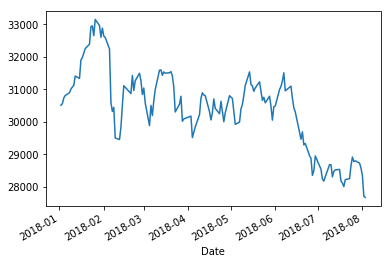

In [49]:
import matplotlib.pyplot as plt
import fix_yahoo_finance as yf  
data = yf.download('^HSI','2018-01-01','2018-08-03')
data.Close.plot()
plt.show()

In [50]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-07-30,28631.050781,28839.240234,28539.560547,28733.130859,28733.130859,1231291800
2018-07-31,28663.140625,28682.310547,28538.029297,28583.009766,28583.009766,1464571200
2018-08-01,28756.720703,28772.800781,28219.970703,28340.740234,28340.740234,1516068100
2018-08-02,28159.009766,28218.279297,27578.089844,27714.560547,27714.560547,1989173700
2018-08-03,27751.599609,27786.150391,27604.560547,27676.320313,27676.320313,1608505200


### 5 days moving average

### Data mining and prediction

### Sentiment Analysis

### Network Analysis

### Data scraping from iefinance (US only)

In [ ]:
from iexfinance import get_historical_data
from datetime import datetime
 
start_date='2016-01-01'
end_date='2017-01-01'
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)
 
data = get_historical_data("AAPL", start=start_date, end=end_date, output_format='pandas')
 
data.close.plot()
plt.show()